# Imports

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Configuraciones

In [62]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

# Carga optimizada del set de datos

In [63]:
zona_prop = pd.read_csv(
                'train.csv', \
                dtype = { \
                    'id' : np.int32, \
                    'tipodepropiedad' : 'category', \
                    'provincia' : 'category', \
                    'ciudad' : 'category', \
                    'antiguedad' : np.float16, \
                    'habitaciones' : np.float16, \
                    'garages' : np.float16, \
                    'banos' : np.float16, \
                    'metroscubiertos' : np.float16, \
                    'metrostotales' : np.float16, \
                    'idzona' : np.float32, \
                    'gimnasio' : 'bool', \
                    'usosmultiples' : 'bool', \
                    'piscina' : 'bool', \
                    'escuelascercanas' : 'bool', \
                    'centroscomercialescercanos' : 'bool', \
                    'precio' : np.float32 \
                },
                parse_dates = ['fecha'],
                date_parser = pd.to_datetime
            )

# Analisis de garage

In [64]:
cant_garages_nan = zona_prop['garages'].isnull().sum()
cant_garages_nan

37765

In [65]:
cant_garages_no_nan = (~zona_prop['garages'].isnull()).sum()
cant_garages_no_nan

202235

In [66]:
cant_propiedades = zona_prop.shape[0]
cant_propiedades

240000

## ¿Cuantas propiedades tienen NaN en garage?

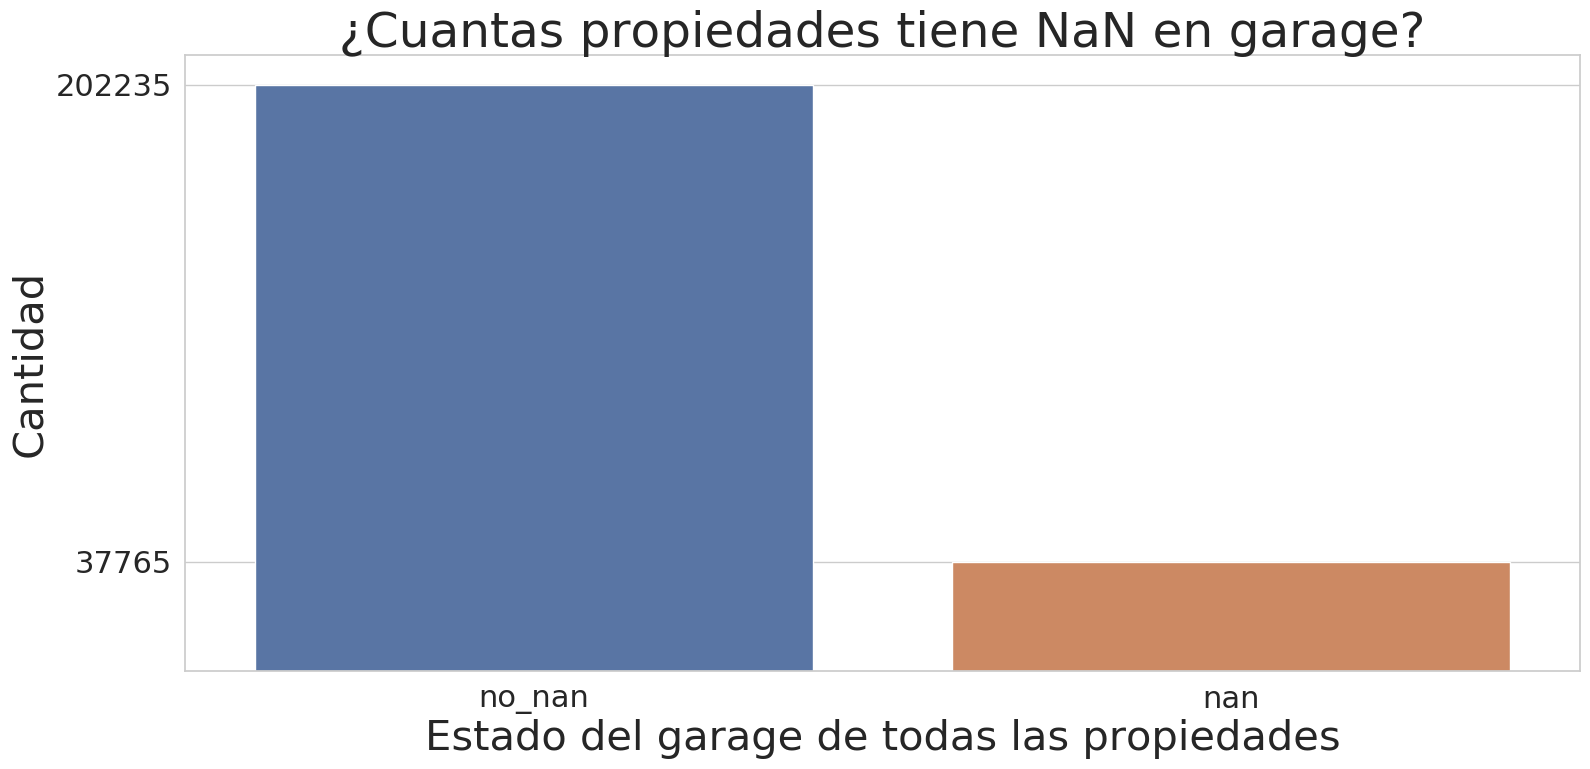

In [67]:
df_cant_garages_nan = pd.DataFrame(
    {'estado_garage' : ['no_nan', 'nan'], 
     'cantidad' : [
         cant_garages_no_nan, 
         cant_garages_nan
     ]}
    )
plot_bar_cant_garage_nan = sns.barplot(
                                x = df_cant_garages_nan['estado_garage'].get_values(),
                                y = df_cant_garages_nan['cantidad'].get_values()
                            )
plot_bar_cant_garage_nan.set_title(
    '¿Cuantas propiedades tiene NaN en garage?',
    fontsize = 35
)
plot_bar_cant_garage_nan.set_xlabel('Estado del garage de todas las propiedades', fontsize = 30)
plot_bar_cant_garage_nan.set_ylabel('Cantidad', fontsize = 30)
plot_bar_cant_garage_nan.set_yticks(df_cant_garages_nan['cantidad'].get_values())


Descartamos las propiedades con NaN en Garage para el analisis

In [68]:
zona_garages = zona_prop.dropna(subset = ['garages'])
zona_garages['garages'].isnull().sum()

0

## ¿Cuantos garages hay por propiedad?

In [69]:
zona_garages['garages'].value_counts()

2.00    94167
1.00    59464
0.00    26926
3.00    21678
Name: garages, dtype: int64

In [70]:
df_frecuencia_garages = zona_garages['garages'].value_counts().to_frame()
df_frecuencia_garages.reset_index(inplace = True)
df_frecuencia_garages.rename(columns = {'index' : 'cantidad', 'garages': 'frecuencia'}, inplace = True)
df_frecuencia_garages.sort_values(by = 'cantidad', inplace = True)
df_frecuencia_garages

,cantidad,frecuencia
2,0.00,26926
1,1.00,59464
0,2.00,94167
3,3.00,21678


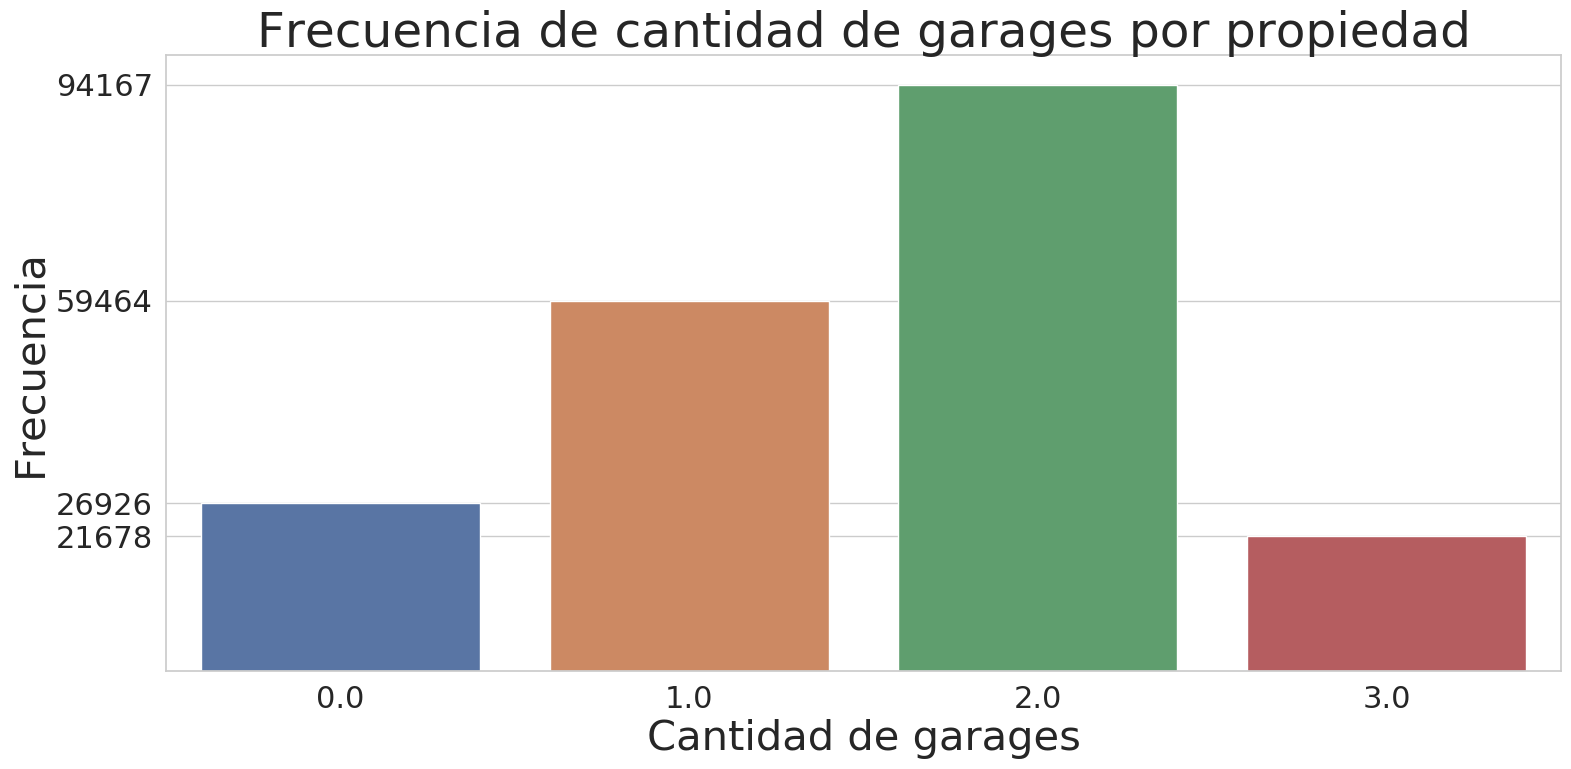

In [71]:
plot_bar_frecuencia_garages = sns.barplot(
                                x = df_frecuencia_garages['cantidad'],
                                y = df_frecuencia_garages['frecuencia']
                            )
plot_bar_frecuencia_garages.set_title(
    'Frecuencia de cantidad de garages por propiedad', 
    fontsize = 35
)
plot_bar_frecuencia_garages.set_xlabel('Cantidad de garages', fontsize = 30)
plot_bar_frecuencia_garages.set_ylabel('Frecuencia', fontsize = 30)
plot_bar_frecuencia_garages.set_yticks(df_frecuencia_garages['frecuencia'].get_values())
plot_bar_frecuencia_garages

## ¿Como se relacionan la cantidad de garages con respecto a la cantidad de banos?

In [72]:
cant_garages_no_nan_y_banos_nan = zona_garages['banos'].isnull().sum()
cant_garages_no_nan_y_banos_nan

18368

### ¿Cuantos datos perdemos si descartamos todos garages en NaN y garages con banos en NaN?

In [73]:
cant_garages_nan

37765

In [74]:
(cant_garages_nan + cant_garages_no_nan_y_banos_nan) / zona_prop.shape[0]

0.2338875

Se termina descartando el 20 % de los datos

In [75]:
zona_garages_banos = zona_garages.dropna(subset = ['banos'])
zona_garages_banos['banos'].isnull().sum()

0

### ¿Cuantas propiedades hay para cada combinacion de garages y banos?

In [76]:
garages_banos_agrupados = zona_garages_banos.groupby(['garages','banos']).agg({'garages' : 'count'})
garages_banos_agrupados.columns = ['cantidad']
garages_banos_agrupados = garages_banos_agrupados.reset_index()
garages_banos_pivot_cantidad = garages_banos_agrupados.pivot_table(index = 'garages', columns = 'banos', values = 'cantidad')
garages_banos_pivot_cantidad

banos,1.0,2.0,3.0,4.0
garages,,,,
0.00,7176,4154,1975,881
1.00,33272,20520,3973,782
2.00,11417,47079,25013,7706
3.00,1135,5943,8901,3940


Text(177.25, 0.5, 'Cantidad de garages')

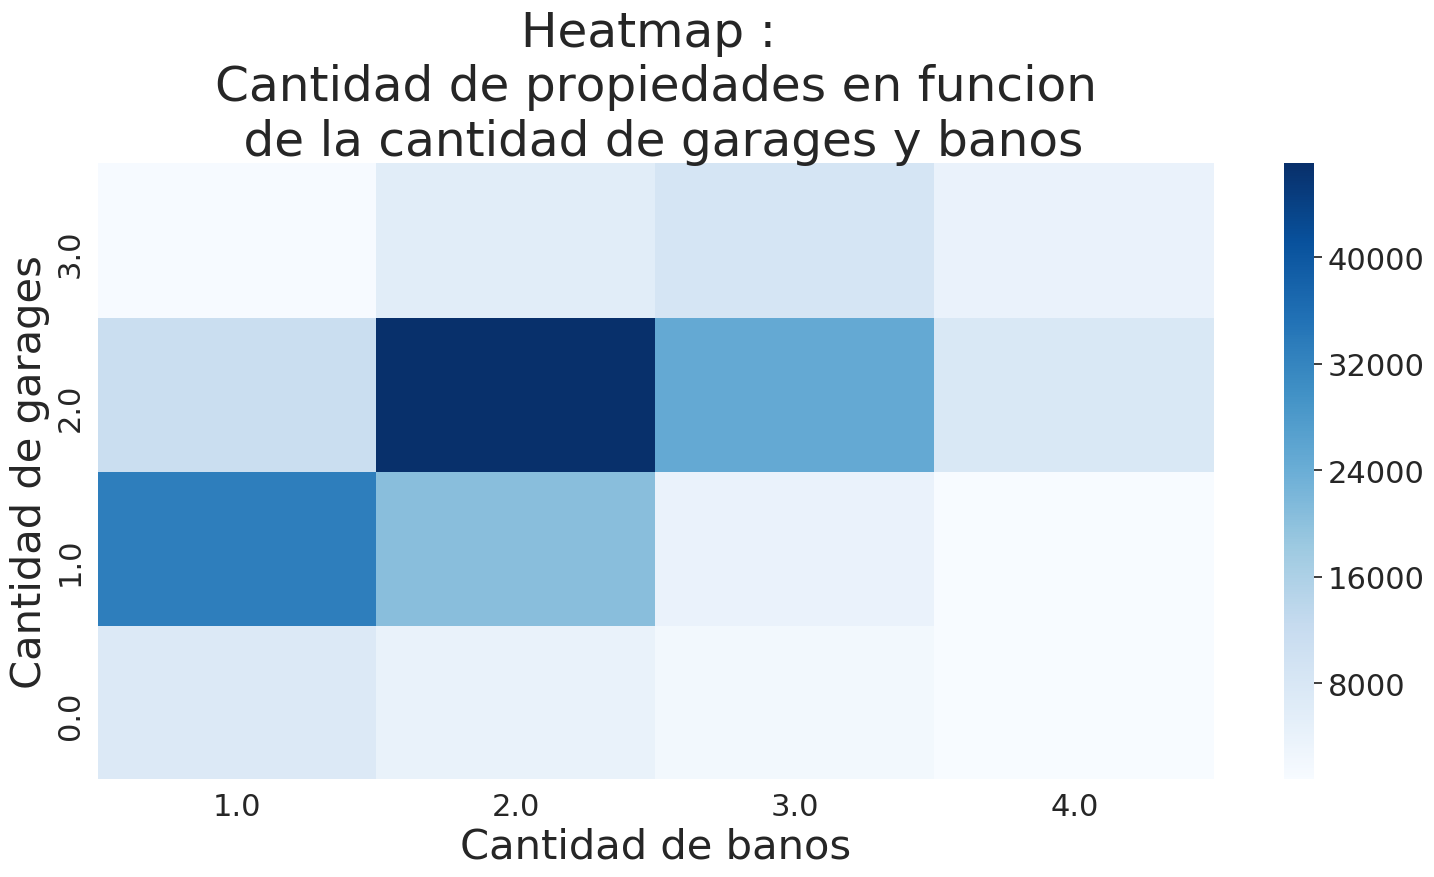

In [77]:
plot_heatmap_garages_banos_cant = sns.heatmap(garages_banos_pivot_cantidad, cmap = 'Blues')
plot_heatmap_garages_banos_cant.invert_yaxis()
plot_heatmap_garages_banos_cant.set_title(
    'Heatmap : \nCantidad de propiedades en funcion\n de la cantidad de garages y banos',
    fontsize = 35
)
plot_heatmap_garages_banos_cant.set_xlabel('Cantidad de banos', fontsize = 30)
plot_heatmap_garages_banos_cant.set_ylabel('Cantidad de garages', fontsize = 30)

Se observa una gran cantidad de propiedades con 2 garages y 2 banos.  
En segundo lugar le siguen las propiedades con 1 garage y 1 bano.  

## ¿Como se relaciona la cantidad de garages con los metroscubiertos de cada propiedad?

### ¿Cuantos datos perdermos si descartamos todos los garages NaN y los garages con metroscubiertos NaN?

In [78]:
cant_garages_nan

37765

In [79]:
cant_garages_no_nan_y_metroscubiertos_nan = zona_garages['metroscubiertos'].isnull().sum()
cant_garages_no_nan_y_metroscubiertos_nan

11518

In [80]:
(cant_garages_nan + cant_garages_no_nan_y_metroscubiertos_nan) / zona_prop.shape[0]

0.20534583333333334

Perdemos un 20 % de los datos

In [81]:
zona_garages_metroscubiertos = zona_garages.dropna(subset = ['metroscubiertos'])
zona_garages_metroscubiertos['metroscubiertos'].isnull().sum()

0

### ¿Como se distribuye los metroscubiertos segun la cantidad de garages por propiedad?

In [82]:
def cuantil_1(serie):
    return serie.quantile(0.25)

def cuantil_3(serie):
    return serie.quantile(0.75)

garages_agrupados_metroscubiertos_estadisticas = zona_garages_metroscubiertos.groupby(['garages']).agg({'metroscubiertos' : [cuantil_1, 'median', cuantil_3]})
garages_agrupados_metroscubiertos_estadisticas

metroscubiertos                                          
                   cuantil_1               median            cuantil_3
garages                                                               
0.00                   72.00               134.00               231.00
1.00                   64.00                83.00               122.00
2.00                  120.00               167.00               232.00
3.00                  195.00               255.00               320.00

In [83]:
garages_agrupados_metroscubiertos_estadisticas.columns = garages_agrupados_metroscubiertos_estadisticas.columns.get_level_values(0) + '_' + garages_agrupados_metroscubiertos_estadisticas.columns.get_level_values(1)
garages_agrupados_metroscubiertos_estadisticas

,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3
garages,,,
0.00,72.00,134.00,231.00
1.00,64.00,83.00,122.00
2.00,120.00,167.00,232.00
3.00,195.00,255.00,320.00


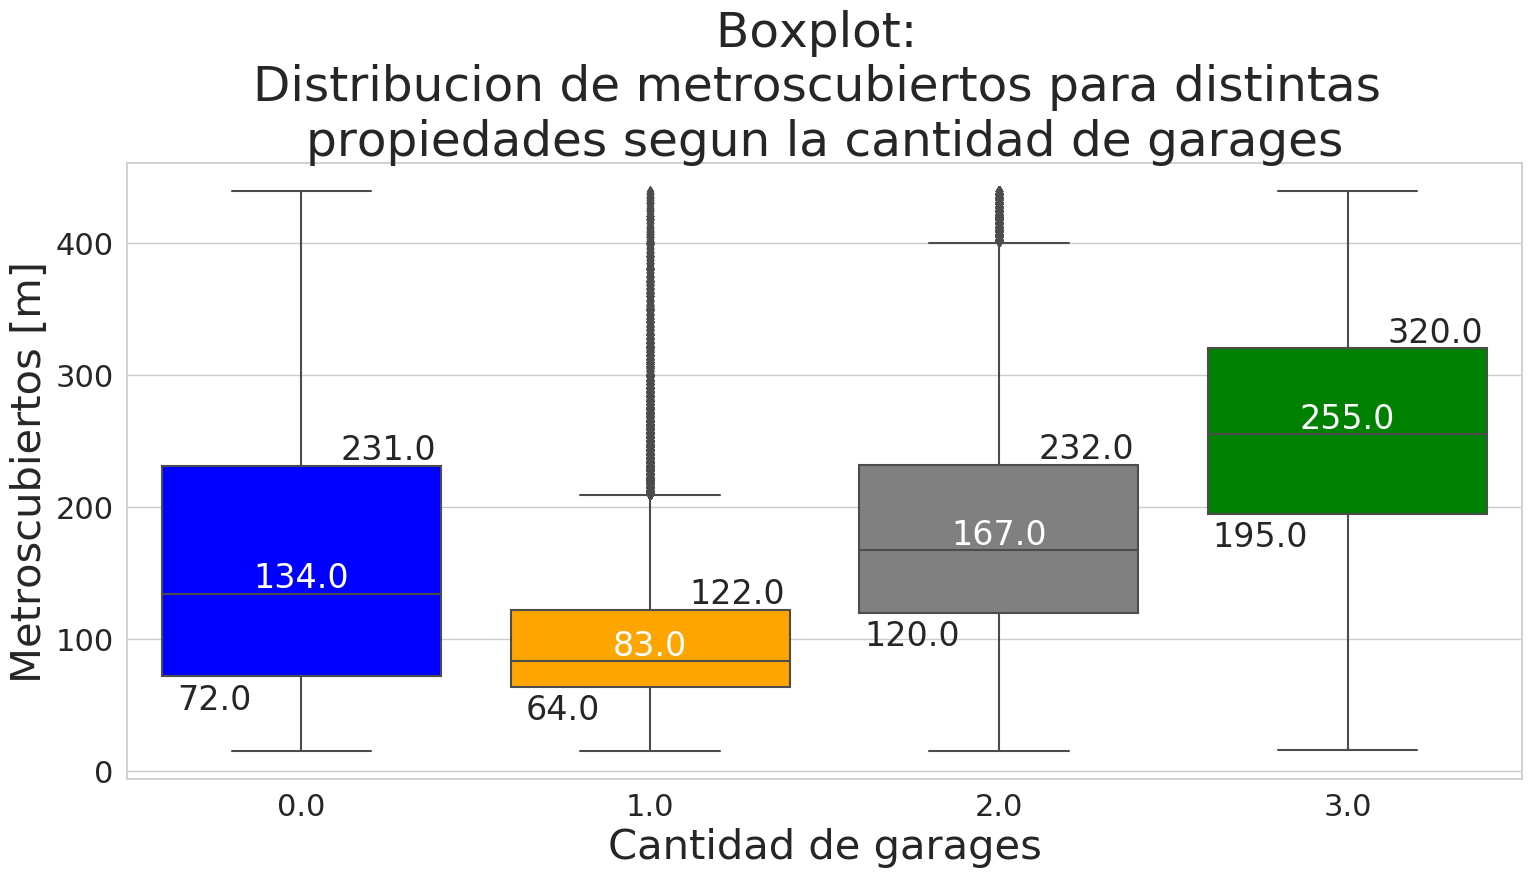

In [84]:
plot_boxplot_metroscubiertos_garages = sns.boxplot(
                                            x = 'garages',
                                            y = 'metroscubiertos',
                                            data = zona_garages_metroscubiertos
                                        )
# Titulos
plot_boxplot_metroscubiertos_garages.set_title(
    'Boxplot: \nDistribucion de metroscubiertos para distintas \npropiedades segun la cantidad de garages',
    fontsize = 35
)
plot_boxplot_metroscubiertos_garages.set_xlabel('Cantidad de garages', fontsize = 30)
plot_boxplot_metroscubiertos_garages.set_ylabel('Metroscubiertos [m]', fontsize = 30)

# Colores de los boxes
colores = ['blue', 'orange', 'grey', 'green'] # Misma cantidad que la cantidad de boxes 
for i in range(len(colores)):
    plot_boxplot_metroscubiertos_garages.artists[i].set_facecolor(colores[i])

# Especificamos los valores numericos de los cuantiles y la mediana
posiciones = range(garages_agrupados_metroscubiertos_estadisticas.shape[0])
for pos, xtick in zip(posiciones,plot_boxplot_metroscubiertos_garages.get_xticks()):
    delta_x = 0.25
    delta_y = 5
    plot_boxplot_metroscubiertos_garages.text(
        xtick - delta_x, 
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'].get_values()[pos] - delta_y*5, 
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'].get_values()[pos],
        horizontalalignment='center'
        #horizontalalignment='left', size='x-small', color='w', weight='semibold'
    )
    plot_boxplot_metroscubiertos_garages.text(
        xtick, 
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'].get_values()[pos] + delta_y,
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'].get_values()[pos],
        horizontalalignment='center', color = 'w'
    )
    plot_boxplot_metroscubiertos_garages.text(
        xtick + delta_x, 
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'].get_values()[pos] + delta_y,
        garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'].get_values()[pos],
        horizontalalignment='center'
    )


## ¿Como se relacionan la cantidad de garages con los metrostotales de cada propiedad?

### ¿Cuantos datos perdemos si descartamos todos los garages NaN y los garages con metrostotales NaN?

In [85]:
cant_garages_nan

37765

In [86]:
cant_garages_no_nan_metrostotales_nan = zona_garages['metrostotales'].isnull().sum()
cant_garages_no_nan_metrostotales_nan

41377

In [87]:
(cant_garages_nan + cant_garages_no_nan_metrostotales_nan) / zona_prop.shape[0]

0.3297583333333333

Perdemos el 33 % de los datos

In [88]:
zona_garages_metrostotales = zona_garages.dropna(subset = ['metrostotales'])
zona_garages_metrostotales['metrostotales'].isnull().sum()

0

### ¿Como se distribuyen los metrostotales segun la cantidad de garages por propiedad?

In [89]:
garages_agrupados_metrostotales_estadisticas = zona_garages_metrostotales.groupby(['garages']).agg({'metrostotales' : [cuantil_1,'median', cuantil_3]})
garages_agrupados_metrostotales_estadisticas

metrostotales                                          
                   cuantil_1               median            cuantil_3
garages                                                               
0.00                  105.00               178.00               274.00
1.00                   69.00                90.00               128.00
2.00                  120.00               160.00               220.00
3.00                  180.00               240.00               300.00

In [90]:
garages_agrupados_metrostotales_estadisticas.columns = garages_agrupados_metrostotales_estadisticas.columns.get_level_values(0) + '_' + garages_agrupados_metrostotales_estadisticas.columns.get_level_values(1)
garages_agrupados_metrostotales_estadisticas

,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
garages,,,
0.00,105.00,178.00,274.00
1.00,69.00,90.00,128.00
2.00,120.00,160.00,220.00
3.00,180.00,240.00,300.00


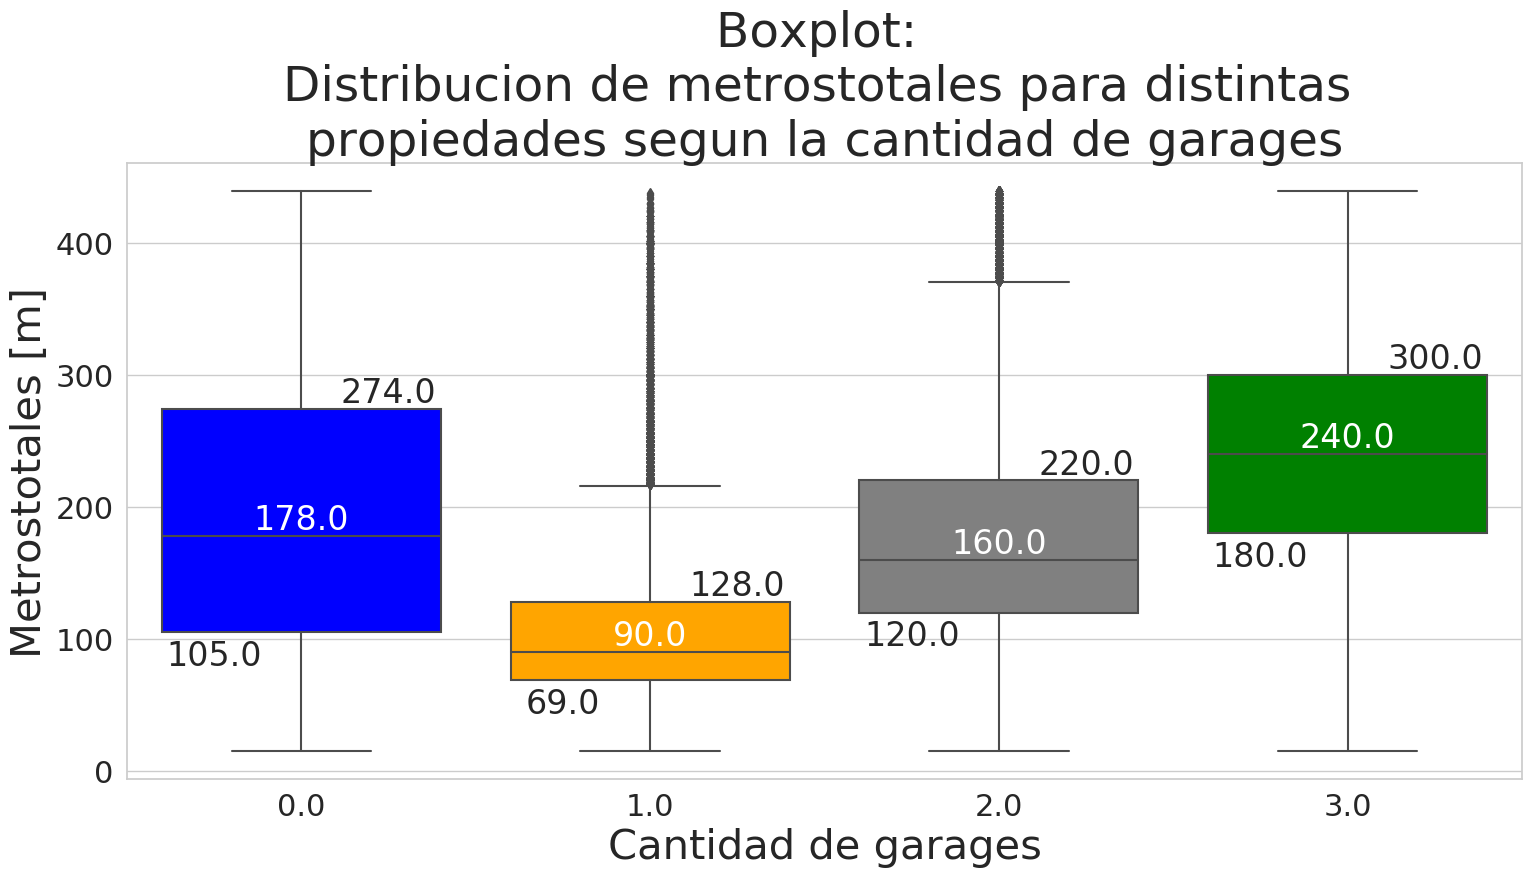

In [91]:
plot_boxplot_metrostotales_garages = sns.boxplot(
                                            x = 'garages',
                                            y = 'metrostotales',
                                            data = zona_garages_metrostotales
                                        )
# Titulos
plot_boxplot_metrostotales_garages.set_title(
    'Boxplot: \nDistribucion de metrostotales para distintas \npropiedades segun la cantidad de garages',
    fontsize = 35
)
plot_boxplot_metrostotales_garages.set_xlabel('Cantidad de garages', fontsize = 30)
plot_boxplot_metrostotales_garages.set_ylabel('Metrostotales [m]', fontsize = 30)

# Colores de los boxes
colores = ['blue', 'orange', 'grey', 'green'] # Misma cantidad que la cantidad de boxes 
for i in range(len(colores)):
    plot_boxplot_metrostotales_garages.artists[i].set_facecolor(colores[i])

# Especificamos los valores numericos de los cuantiles y la mediana
posiciones = range(garages_agrupados_metrostotales_estadisticas.shape[0])
for pos, xtick in zip(posiciones,plot_boxplot_metrostotales_garages.get_xticks()):
    delta_x = 0.25
    delta_y = 5
    plot_boxplot_metrostotales_garages.text(
        xtick - delta_x, 
        garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'].get_values()[pos] - delta_y*5, 
        garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'].get_values()[pos],
        horizontalalignment='center'
    )
    plot_boxplot_metrostotales_garages.text(
        xtick, 
        garages_agrupados_metrostotales_estadisticas['metrostotales_median'].get_values()[pos] + delta_y,
        garages_agrupados_metrostotales_estadisticas['metrostotales_median'].get_values()[pos],
        horizontalalignment='center', color = 'w'
    )
    plot_boxplot_metrostotales_garages.text(
        xtick + delta_x, 
        garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'].get_values()[pos] + delta_y,
        garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'].get_values()[pos],
        horizontalalignment='center'
    )

## ¿Que obtenemos al comparar las distribuciones de metros totales y cubiertos segun la cantidad de garages?

### ¿Cuantos datos perdemos si descartamos garages nan, garages con metroscubiertos nan y garages con metroscubiertos y metrostolaes nan?

In [92]:
cant_garages_nan

37765

In [93]:
cant_garages_no_nan_y_metroscubiertos_nan

11518

In [94]:
(cant_garages_nan + cant_garages_no_nan_y_metroscubiertos_nan + zona_garages_metroscubiertos['metrostotales'].isnull().sum()) / zona_prop.shape[0]

0.37775

Perdemos el 38 % de los datos

In [95]:
zona_garages_metros = zona_garages_metroscubiertos.dropna(subset = ['metrostotales'])
zona_garages_metros['metrostotales'].isnull().sum()

0

### ¿Que podemos visualizar en la comparacion de los metros cubiertos y totales de cada propiedad segun la cantidad de garages?

In [96]:
garages_agrupados_metros_estadisticas =  zona_garages_metros.groupby(['garages']).agg({'metroscubiertos' : [cuantil_1, 'median', cuantil_3], 'metrostotales' : [cuantil_1, 'median', cuantil_3]})
garages_agrupados_metros_estadisticas

metroscubiertos                                            \
                   cuantil_1               median            cuantil_3   
garages                                                                  
0.00                   80.00               144.00               231.00   
1.00                   65.00                86.00               130.00   
2.00                  120.00               170.00               232.00   
3.00                  190.00               250.00               313.00   

               metrostotales                                            
                   cuantil_1               median            cuantil_3  
garages                                                                 
0.00                   89.00               140.00               219.00  
1.00                   68.00                90.00               127.00  
2.00                  120.00               160.00               216.00  
3.00                  175.00               235.00               300.00

In [97]:
garages_agrupados_metros_estadisticas.columns = garages_agrupados_metros_estadisticas.columns.get_level_values(0) + '_' + garages_agrupados_metros_estadisticas.columns.get_level_values(1)
garages_agrupados_metros_estadisticas = garages_agrupados_metros_estadisticas.reset_index()
garages_agrupados_metros_estadisticas

,garages,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
0,0.00,80.00,144.00,231.00,89.00,140.00,219.00
1,1.00,65.00,86.00,130.00,68.00,90.00,127.00
2,2.00,120.00,170.00,232.00,120.00,160.00,216.00
3,3.00,190.00,250.00,313.00,175.00,235.00,300.00


In [98]:
melt_garages_metros = pd.melt(zona_garages_metros, id_vars = 'garages', value_vars = ['metroscubiertos', 'metrostotales'])
melt_garages_metros.columns = ['garages', 'tipometros', 'valor']
melt_garages_metros

,garages,tipometros,valor
0,1.00,metroscubiertos,80.00
1,2.00,metroscubiertos,268.00
2,2.00,metroscubiertos,144.00
3,1.00,metroscubiertos,63.00
4,1.00,metroscubiertos,95.00
5,1.00,metroscubiertos,75.00
6,1.00,metroscubiertos,140.00
7,2.00,metroscubiertos,293.00
8,2.00,metroscubiertos,170.00
9,0.00,metroscubiertos,227.00


In [99]:
garages_agrupados_metros_estadisticas = melt_garages_metros.groupby(['garages', 'tipometros']).agg({'valor' : [cuantil_1, 'median', cuantil_3]})
garages_agrupados_metros_estadisticas = garages_agrupados_metros_estadisticas.unstack()
garages_agrupados_metros_estadisticas.columns = garages_agrupados_metros_estadisticas.columns.get_level_values(2) + '_' + garages_agrupados_metros_estadisticas.columns.get_level_values(1)
garages_agrupados_metros_estadisticas

,metroscubiertos_cuantil_1,metrostotales_cuantil_1,metroscubiertos_median,metrostotales_median,metroscubiertos_cuantil_3,metrostotales_cuantil_3
garages,,,,,,
0.00,80.00,89.00,144.00,140.00,231.00,219.00
1.00,65.00,68.00,86.00,90.00,130.00,127.00
2.00,120.00,120.00,170.00,160.00,232.00,216.00
3.00,190.00,175.00,250.00,235.00,313.00,300.00


Text(0, 0.5, 'Metros [m]')

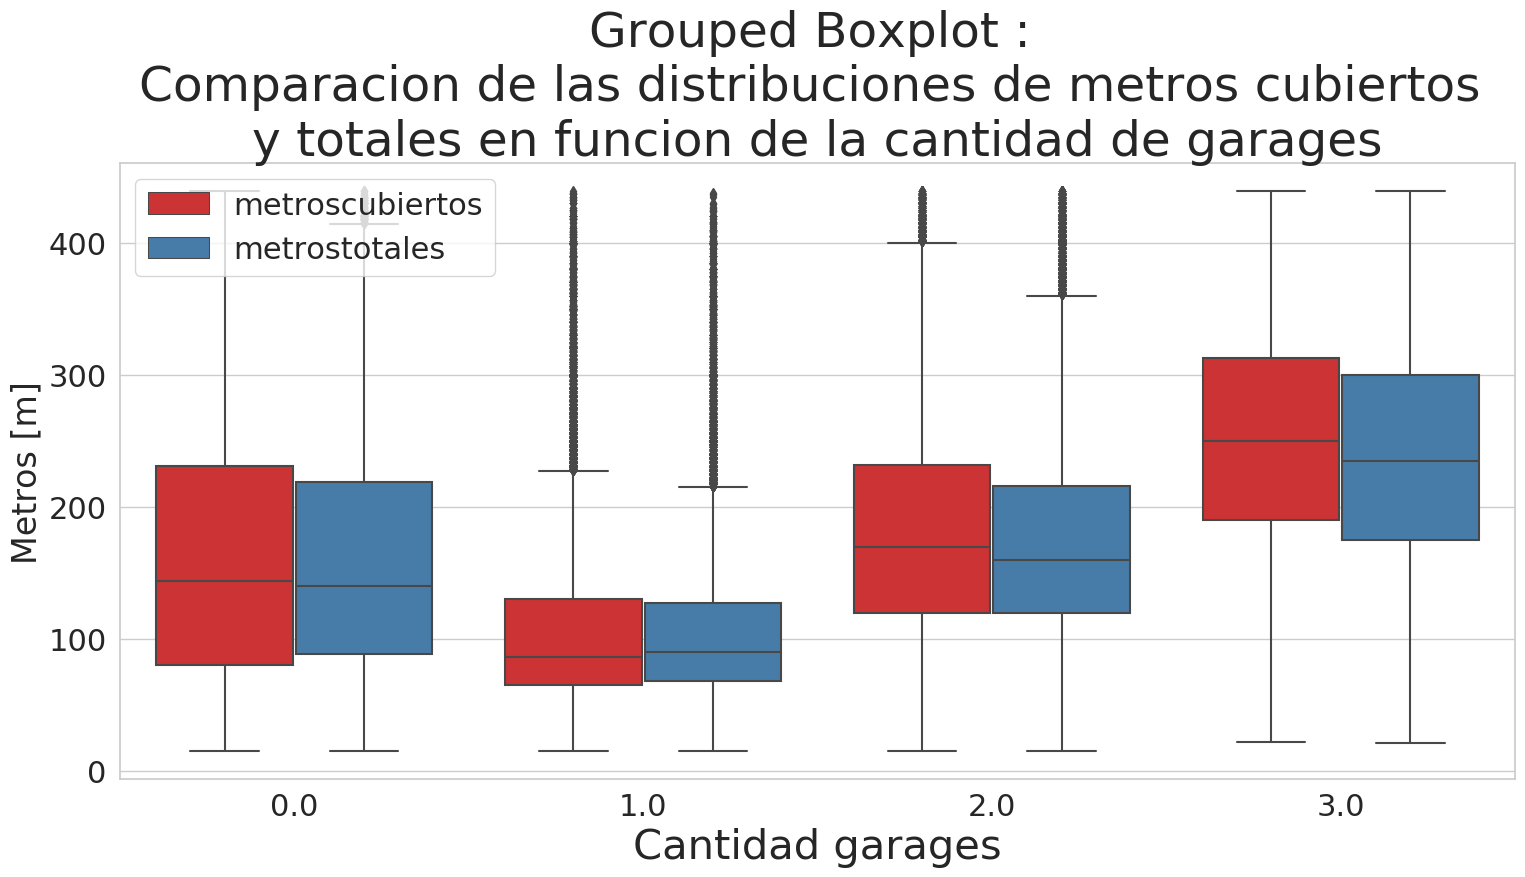

In [100]:
plot_boxplot_group_tipometros_garages = sns.boxplot(
                                            x = melt_garages_metros['garages'].get_values(),
                                            y = melt_garages_metros['valor'].get_values(),
                                            hue = 'tipometros',
                                            data = melt_garages_metros,
                                            palette = 'Set1'
                                        )

plot_boxplot_group_tipometros_garages.legend(loc = 'upper left')
plot_boxplot_group_tipometros_garages.set_title(
    'Grouped Boxplot : \nComparacion de las distribuciones de metros cubiertos \ny totales en funcion de la cantidad de garages',
    fontsize = 35
)
plot_boxplot_group_tipometros_garages.set_xlabel('Cantidad garages', fontsize = 30)
plot_boxplot_group_tipometros_garages.set_ylabel('Metros [m]')

## ¿Como evoluciono la  cantidad de garages con el tiempo?

### ¿Cuantos datos perdemos si descartamos garages NaN y garages con fechas NaN?

In [101]:
cant_garages_nan

37765

In [102]:
zona_garages['fecha'].isnull().sum()

0

No tenemos fechas NaN.  
Pero, ¿ todas las fechas tienen sentido en el contexto del data set ?

In [107]:
zona_garages['fecha'].dt.year.unique()

array([2015, 2013, 2012, 2016, 2014])

Ningun año parece fuera de contexto, dado que son cada uno seguido de otro.  
Concluimos que las fechas estan limpias (aunque no hayamos verificado, mes, dias, hora, minuto, segundo)

In [105]:
(cant_garages_nan + zona_garages['fecha'].isnull().sum()) / zona_prop.shape[0]

0.15735416666666666

No perdemos mas datos de los ya descartados por garages NaN.  

### ¿Como evoluciono la cantidad de garages por propiedad con el tiempo?

In [113]:
zona_garages = zona_garages.copy()
zona_garages['anio'] = zona_garages['fecha'].dt.year

Text(0, 0.5, 'Cantidad')

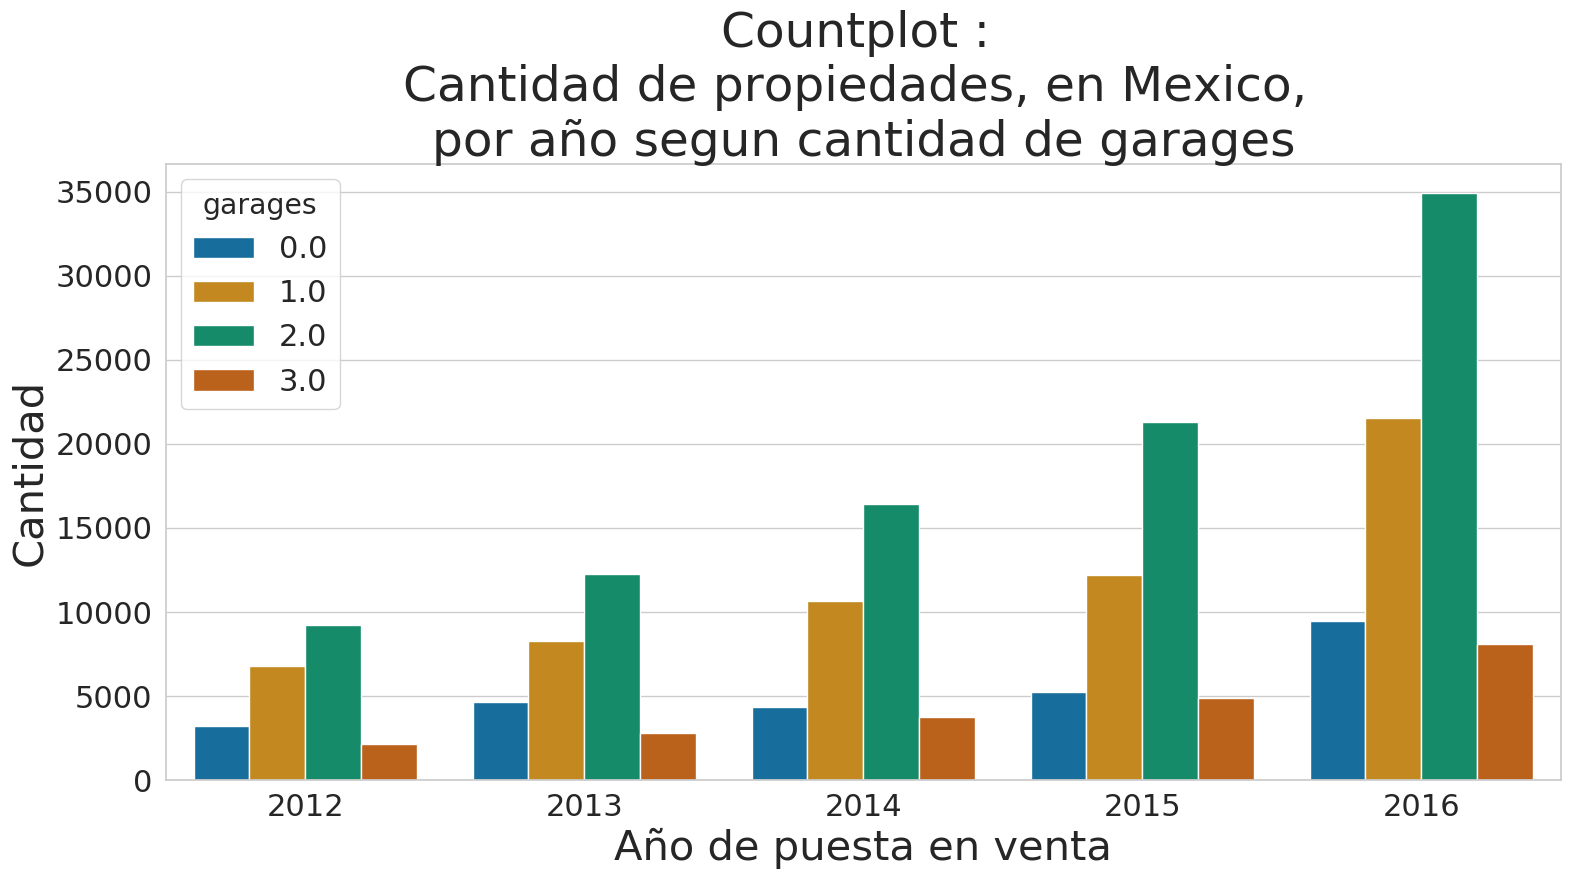

In [124]:
plot_countplot_garages_anio = sns.countplot(
                                x = 'anio',
                                hue  = 'garages',
                                data = zona_garages,
                                palette = 'colorblind'
                            )
plot_countplot_garages_anio.set_title(
    'Countplot : \nCantidad de propiedades, en Mexico, \npor año segun cantidad de garages',
    fontsize = 35
)

plot_countplot_garages_anio.set_xlabel('Año de puesta en venta', fontsize = 30)
plot_countplot_garages_anio.set_ylabel('Cantidad', fontsize = 30)

Desde 2012 hasta 2015 vemos un crecimiento lineal de las cantidades de propiedades en todo  en venta para todas las variaciones de cantidad de propiedades.  
Del 2015 a 2016, vemos que la cantidad de propiedades en venta se duplica en todas las categorias.  
En todos la años, siempre predomina las propiedades con 2 garages, seguidos de 1, 0 y 3.


## Garages-Gimnasio

### ¿Cuantos datos perdemos si descaramos todos la garages NaN y los garages con Gimnasio NaN?

In [125]:
cant_garages_nan

37765

In [126]:
zona_garages['gimnasio'].isnull().sum()

0

No perdemos mas datos, en este analisis

### ¿Cuantas propieades tienen gimnasio segun la cantidad de garages?

In [136]:
garages_agrupados_gimnasio_cantidad = zona_garages.groupby(['garages']).agg({'gimnasio' : 'value_counts'})
garages_agrupados_gimnasio_cantidad.columns = ['cantidad_propieades']
garages_agrupados_gimnasio_cantidad = garages_agrupados_gimnasio_cantidad.reset_index()
garages_agrupados_gimnasio_cantidad.columns = ['garages', 'tiene_gimnasio', 'cantidad_propieades']
garages_agrupados_gimnasio_cantidad

,garages,tiene_gimnasio,cantidad_propieades
0,0.00,False,26671
1,0.00,True,255
2,1.00,False,57478
3,1.00,True,1986
4,2.00,False,86698
5,2.00,True,7469
6,3.00,False,19578
7,3.00,True,2100


Text(0, 0.5, 'Cantidad de propiedades')

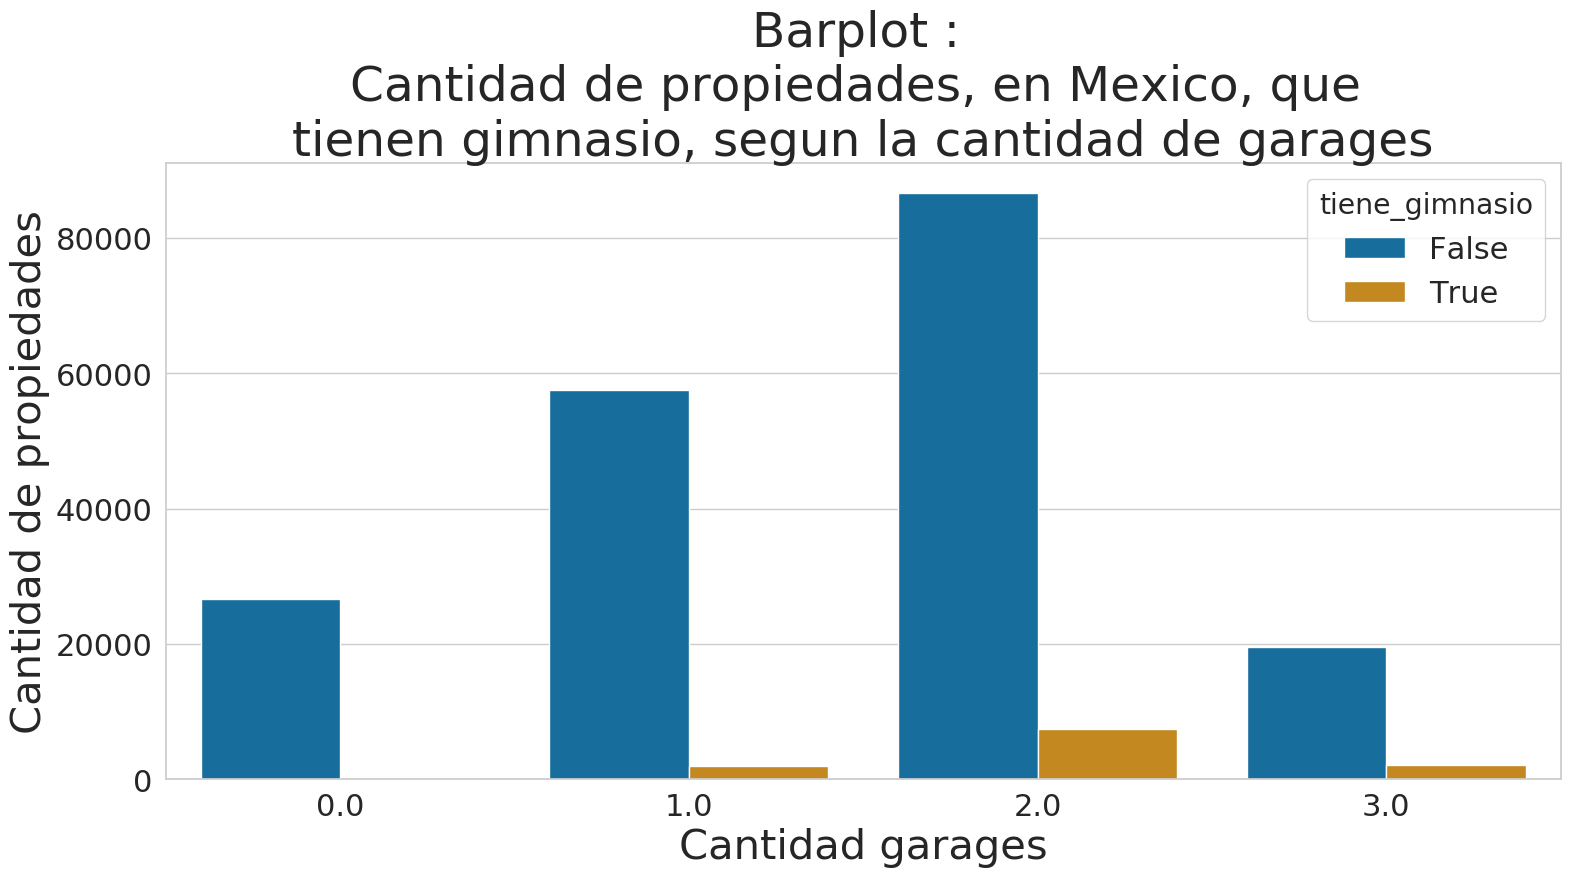

In [160]:
plot_countplot_garages_gimnasio = sns.barplot(
                                    x = 'garages', 
                                    hue = 'tiene_gimnasio',
                                    y = 'cantidad_propieades',
                                    data = garages_agrupados_gimnasio_cantidad,
                                    palette = 'colorblind'
                                )
plot_countplot_garages_gimnasio.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, que \ntienen gimnasio, segun la cantidad de garages',
    fontsize = 35
)
plot_countplot_garages_gimnasio.set_xlabel('Cantidad garages', fontsize = 30)
plot_countplot_garages_gimnasio.set_ylabel('Cantidad de propiedades', fontsize = 30)



Practicamenet hay pocas propiedades que tienen gimnasio, y eso parece no depender de la cantidad de garages.  
La cantidad de propiedades con gimnasio parece nula en para los que tienen garage, pero en realidad es un valor muy chico.

In [152]:
garages_agrupados_gimnasio_cantidad_zoom_sin_1_2 = garages_agrupados_gimnasio_cantidad.loc[(~(garages_agrupados_gimnasio_cantidad['garages'].isin([1,2])))]
garages_agrupados_gimnasio_cantidad_zoom_sin_1_2

,garages,tiene_gimnasio,cantidad_propieades
0,0.00,False,26671
1,0.00,True,255
6,3.00,False,19578
7,3.00,True,2100


Text(0, 0.5, 'Cantidad de propiedades')

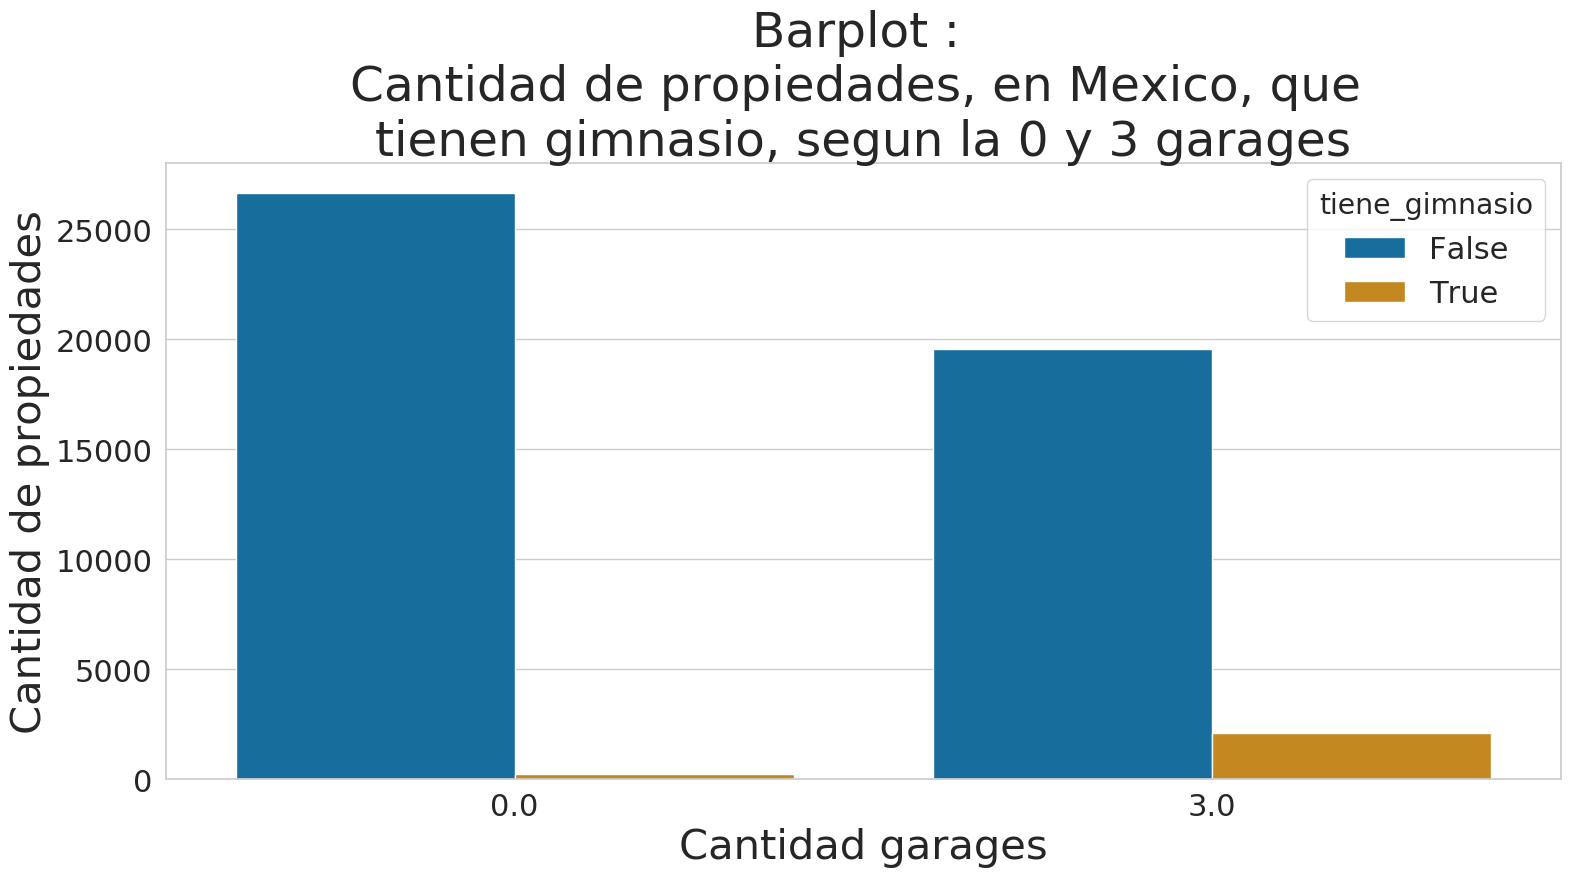

In [158]:
plot_countplot_garages_gimnasio = sns.barplot(
                                    x = 'garages', 
                                    hue = 'tiene_gimnasio',
                                    y = 'cantidad_propieades',
                                    data = garages_agrupados_gimnasio_cantidad_zoom_sin_1_2,
                                    palette = 'colorblind'
                                )
plot_countplot_garages_gimnasio.set_title(
    'Barplot : \nCantidad de propiedades, en Mexico, que \ntienen gimnasio, segun la 0 y 3 garages',
    fontsize = 35
)
plot_countplot_garages_gimnasio.set_xlabel('Cantidad garages', fontsize = 30)
plot_countplot_garages_gimnasio.set_ylabel('Cantidad de propiedades', fontsize = 30)

Aun con este zoom, la cantidad de propiedades con cero garages y gimansio es muy pequeña, comparado al grueso de todo Mexico.